In [10]:

import pandas as pd
from matplotlib import pyplot as plt

df_man_names = pd.read_csv('Number_of_names_man.csv', sep=';', skiprows=[1])
df_woman_names = pd.read_csv('Number_of_names_woman.csv', sep=';', skiprows=[1])


def show_top_10_name(df):
    overall_top = df.groupby('Name')['NumberOfPersons'].sum().nlargest(10)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(overall_top.index, overall_top.values)
    ax.set_xlabel('Имя')
    ax.set_ylabel('Количество человек')
    ax.set_title('Топ-10 популярных имен')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def show_dynamic_by_year(df):
    yearst_names = df.groupby(['Year', 'Name'])['NumberOfPersons'].sum().reset_index()
    overall_top = df.groupby('Name')['NumberOfPersons'].sum().nlargest(10)

    fig, ax = plt.subplots(figsize=(14, 7))

    for name in overall_top.index:
        name_by_year = yearst_names[yearst_names['Name'] == name].copy()
        name_by_year = name_by_year.sort_values('Year')
        ax.plot(name_by_year['Year'], name_by_year['NumberOfPersons'], marker='o', label=name)

    ax.set_xlabel('Год')
    ax.set_ylabel('Количество человек')
    ax.set_title('Динамика популярности имен по годам')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def show_top_10_by_month(df):
    months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь',
              'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()

    for i, month in enumerate(months):
        month_data = df[df['Month'] == month]
        top_10 = month_data.groupby('Name')['NumberOfPersons'].sum().nlargest(10)

        axes[i].barh(range(10), top_10.values[::-1])
        axes[i].set_yticks(range(10))
        axes[i].set_yticklabels(top_10.index[::-1])
        axes[i].set_title(month)
        axes[i].set_xlabel('Количество')

    plt.tight_layout()
    plt.show()

def show_top_100(df):
    top_100 = df.groupby('Name')['NumberOfPersons'].sum().nlargest(100)

    fig, ax = plt.subplots(figsize=(20, 12))
    ax.barh(range(100), top_100.values[::-1])
    ax.set_yticks(range(0, 100, 5))
    ax.set_yticklabels(top_100.index[::-1][::5])
    ax.set_xlabel('Количество человек')
    ax.set_ylabel('Имя')
    ax.set_title('Топ-100 популярных мужских имен (2015-2025)')
    plt.tight_layout()
    plt.show()

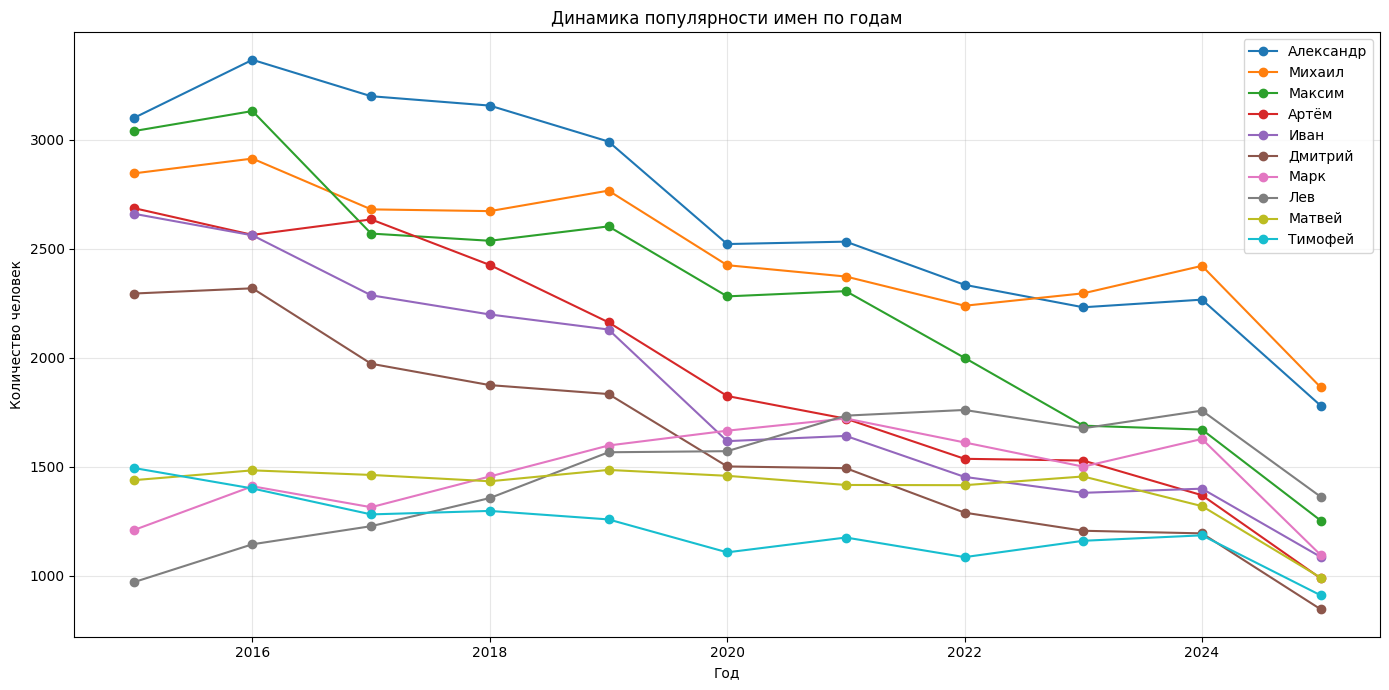

In [11]:
show_dynamic_by_year(df_man_names)

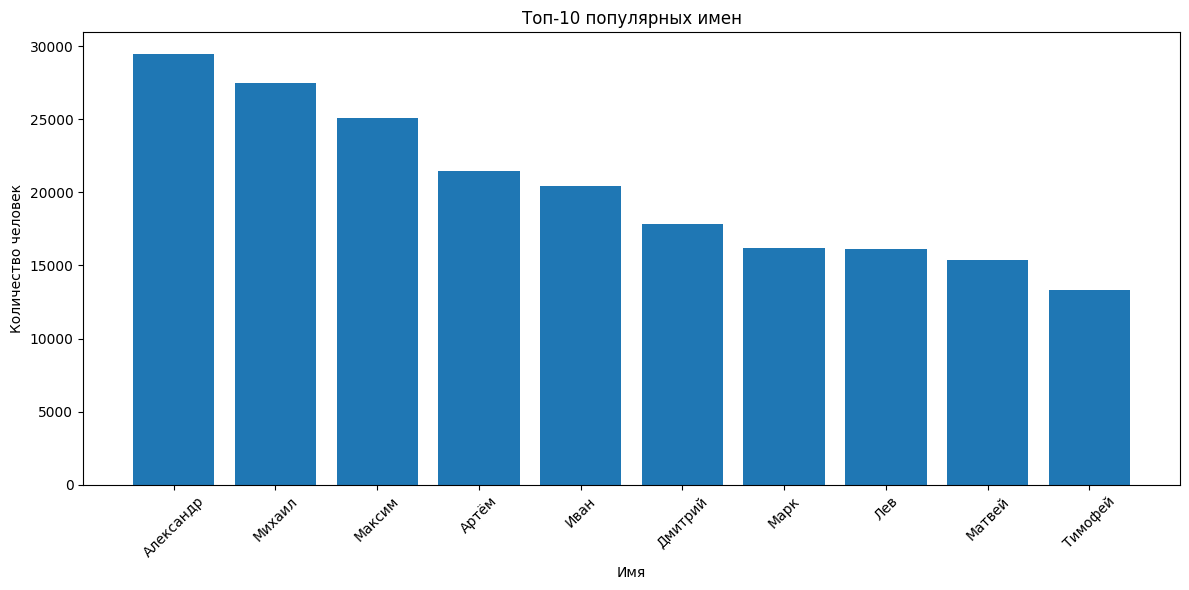

In [12]:
show_top_10_name(df_man_names)

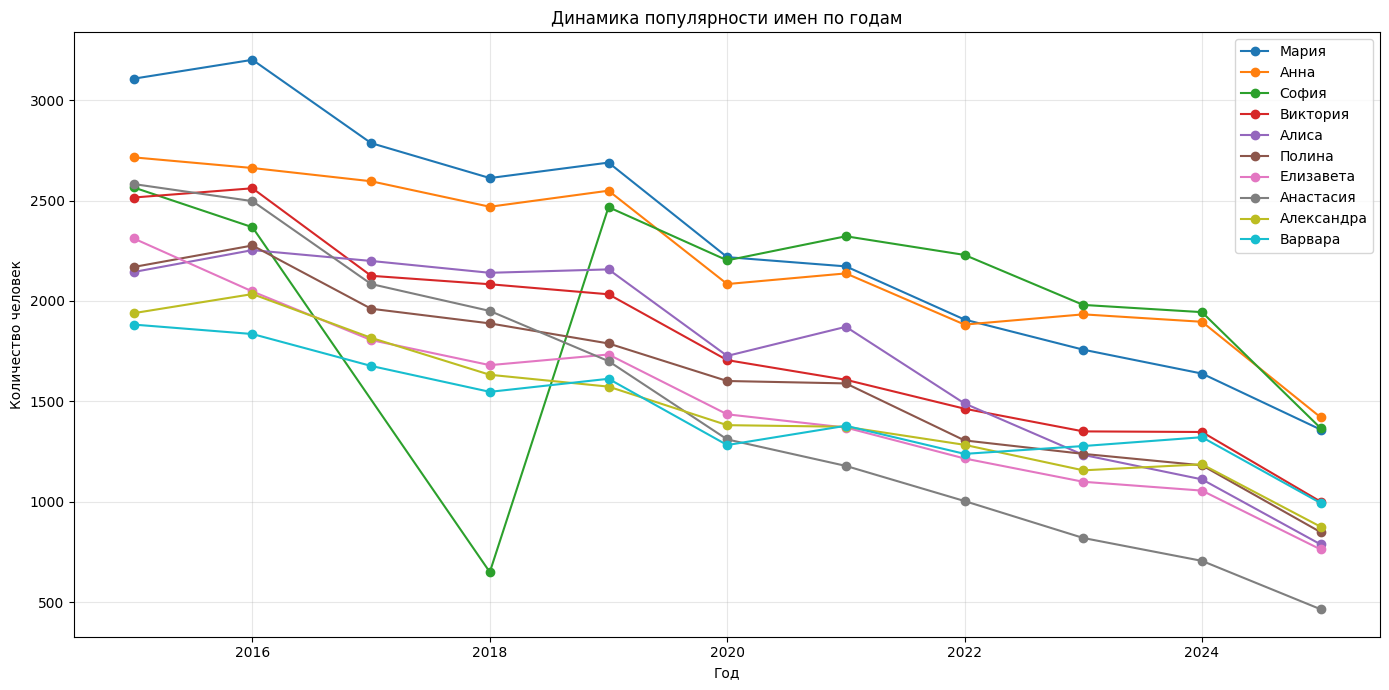

In [13]:

show_dynamic_by_year(df_woman_names)

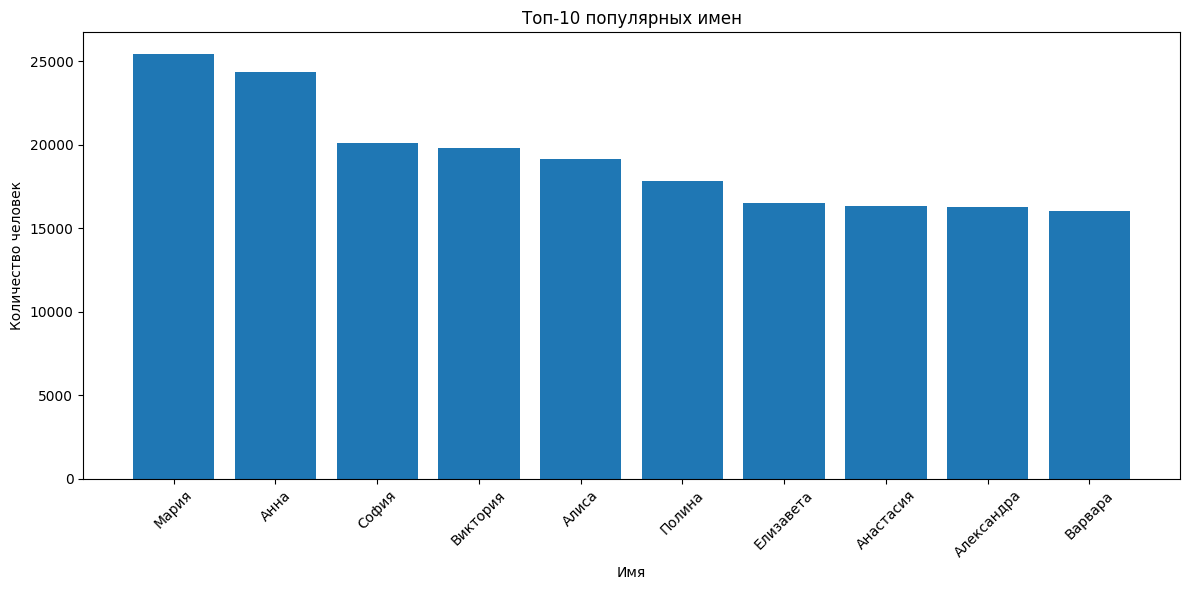

In [14]:
show_top_10_name(df_woman_names)

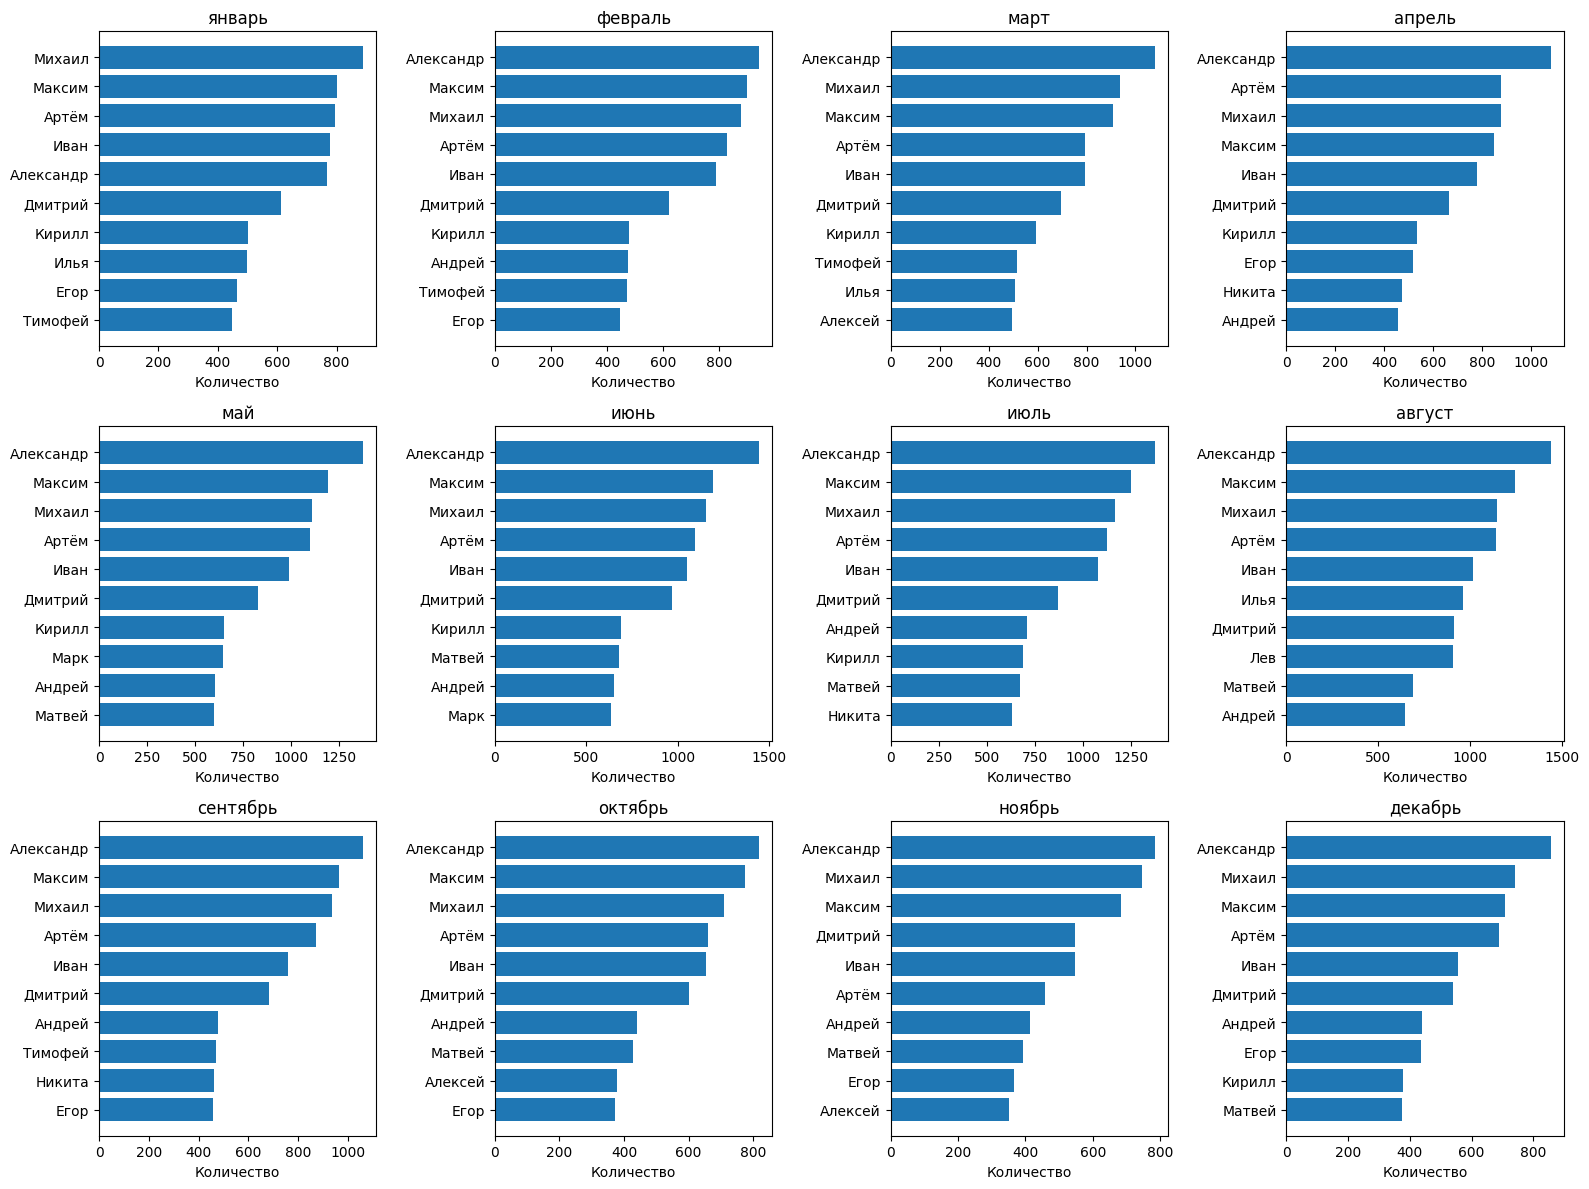

In [15]:
show_top_10_by_month(df_man_names)

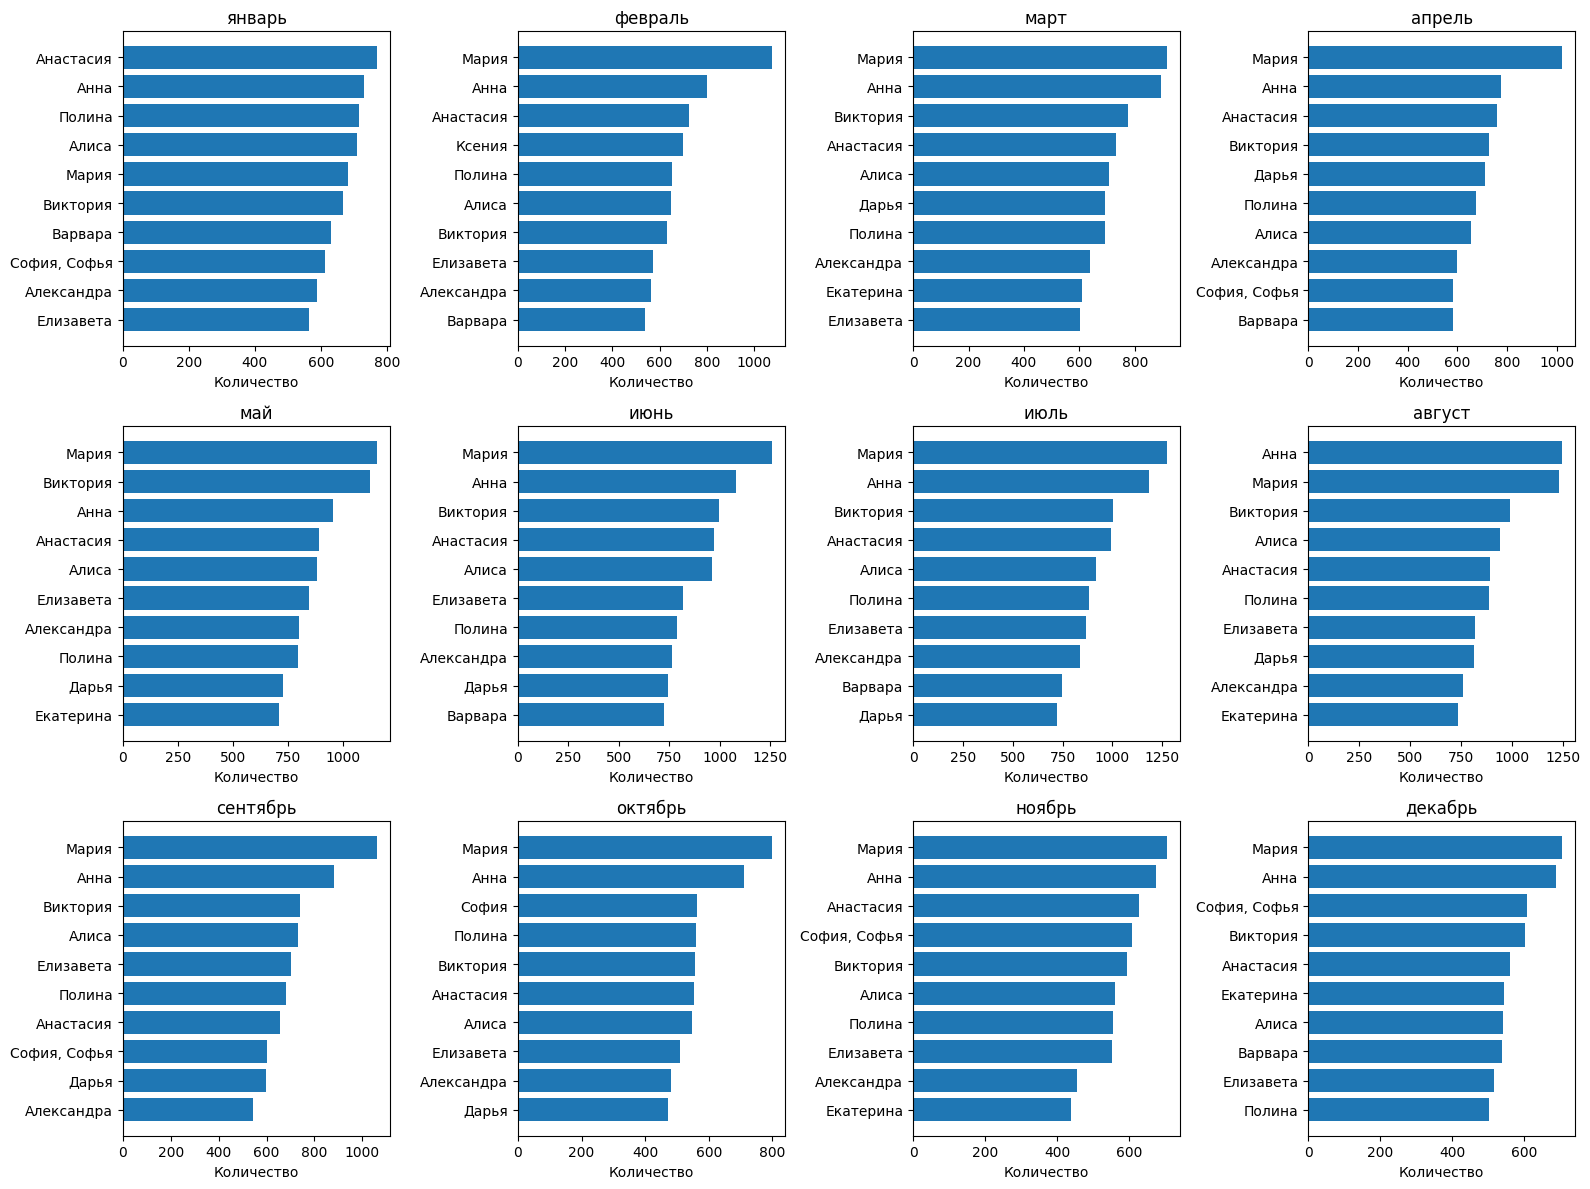

In [16]:
show_top_10_by_month(df_woman_names)

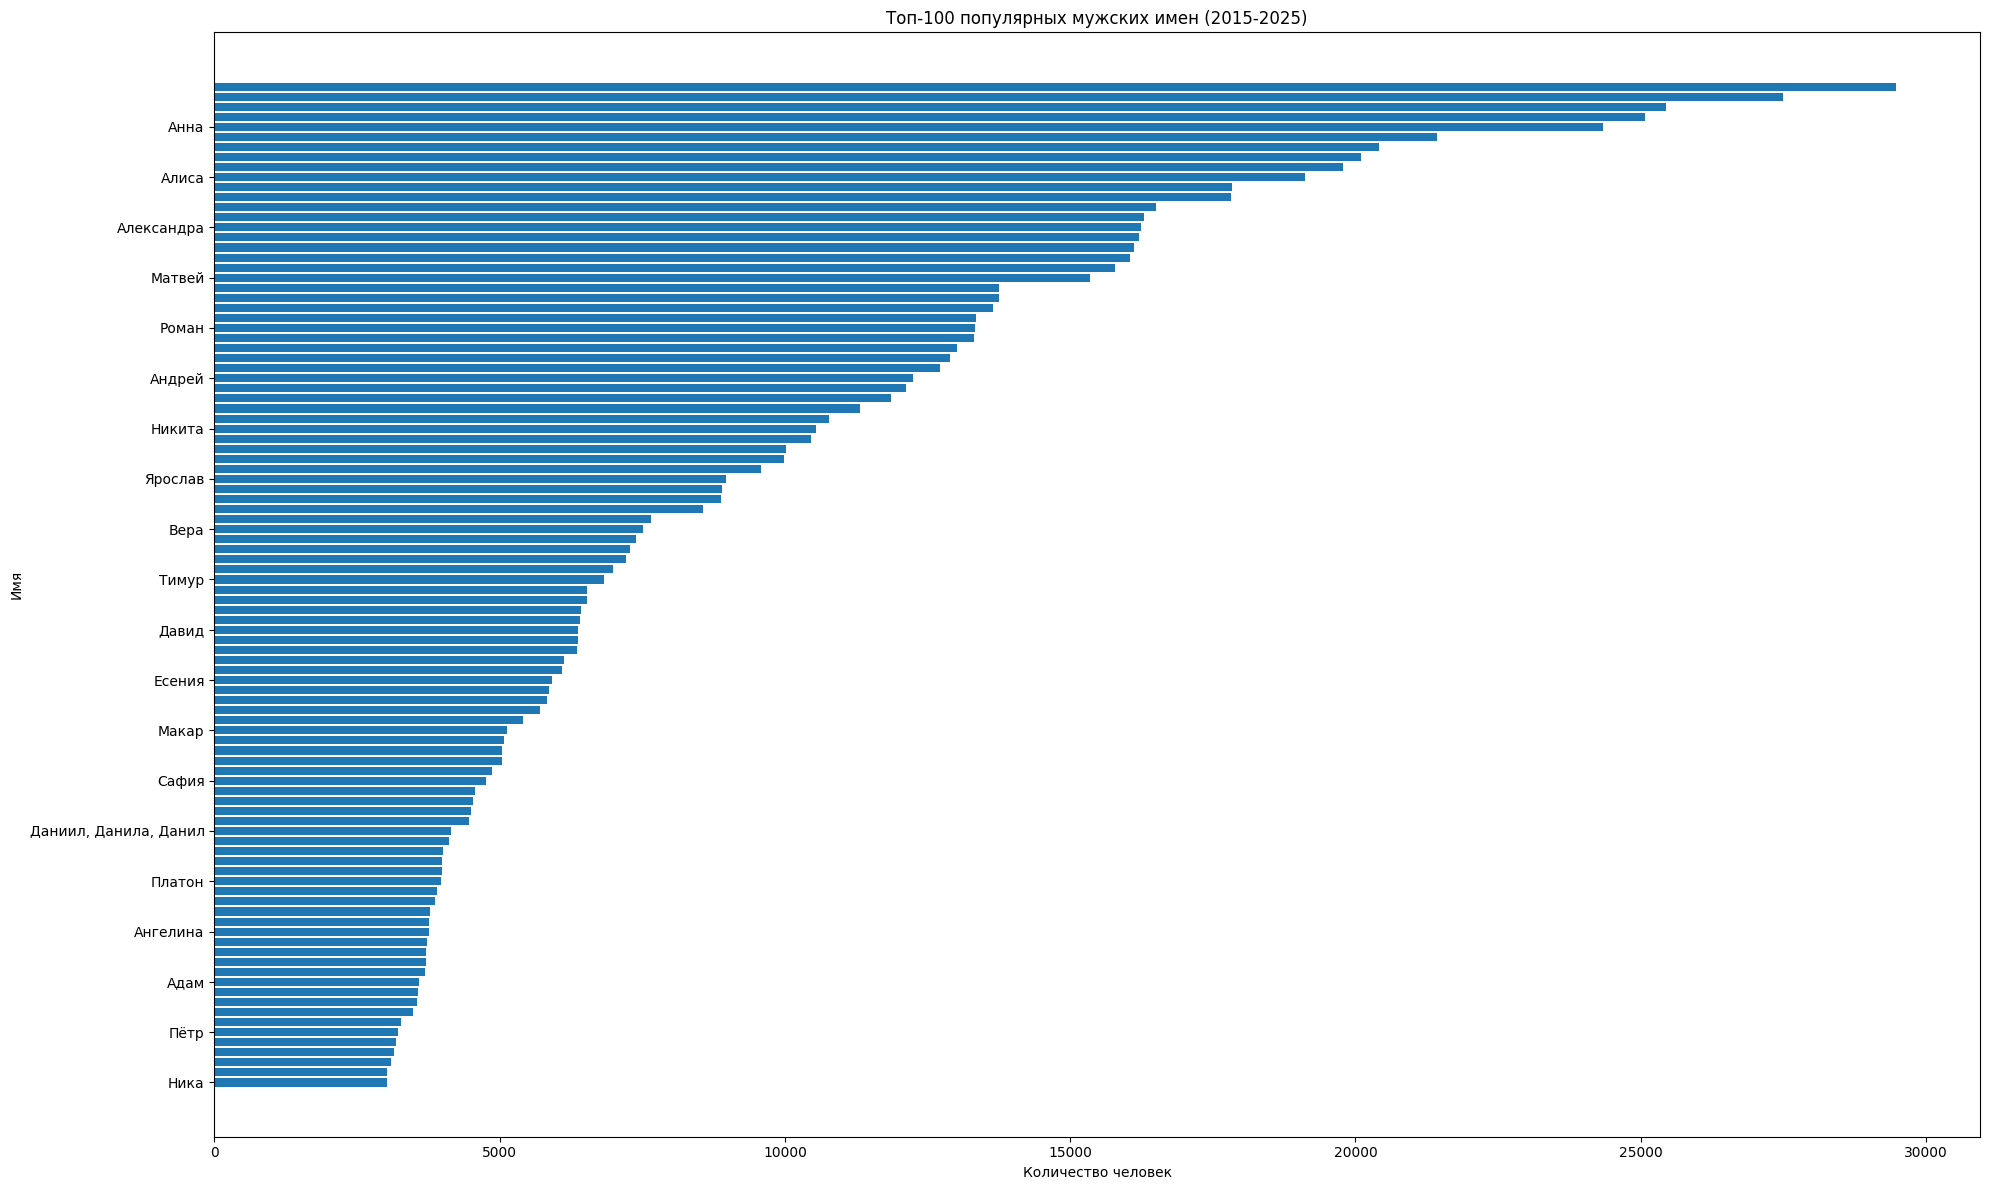

In [17]:
df_all_names = pd.concat([df_man_names, df_woman_names], ignore_index=True)
show_top_100(df_all_names)